In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MLP():
    def __init__(self, X, Y, learning_rate=0.05, validation_split=None):
        self.X = X
        self.Y = Y
        self.X_train = self.X_valid = self.Y_train = self.Y_valid = None
        self.lr = learning_rate
        self.validation_split = validation_split
        self.W1 = self.W2 = self.b1 = self.b2 = self.z1 = self.z2 = self.A1 = self.A2 = None
        self.dW1 = self.dW2 = self.db1 = self.db2 = self.dz1 = self.dz2 = None
        self.training_loss = self.validation_loss = None
    
    def split_samples(self):
        indices = np.arange(N)
        np.random.shuffle(indices)
        x = self.X[:, indices]
        y = self.Y[:, indices]
        vs = 0
        m = self.X.shape[1]
        if self.validation_split is not None:
            vs = int(self.validation_split*m)
        self.X_train = x[:, 0:(m-vs)]
        self.Y_train = y[:, 0:(m-vs)]
        self.X_valid = x[:, (m-vs):]
        self.Y_valid = y[:, (m-vs):]
        
        
    def initialise_params(self):
        self.W1 = np.random.randn(2, 2)
        self.b1 = np.random.randn(2, 1)
        
        self.W2 = np.random.randn(1, 2)
        self.b2 = np.random.randn(1, 1)

    def sigmoid(self, x):
        return 1/(1 + np.exp(-1*x))
        
    def forward_prop(self, X):
        self.z1 = self.W1@X + self.b1
        self.A1 = self.sigmoid(self.z1)
        
        self.z2 = self.W2@self.A1 + self.b2
        self.A2 = self.sigmoid(self.z2)
    
    def predict_for_valid(self, X):
        z1 = self.W1@X + self.b1
        A1 = self.sigmoid(z1)
        
        z2 = self.W2@A1 + self.b2
        A2 = self.sigmoid(z2)
        return A2
    
    def predict(self, X):
        z1 = self.W1@X + self.b1
        A1 = self.sigmoid(z1)
        
        z2 = self.W2@A1 + self.b2
        A2 = self.sigmoid(z2)
        A2[A2 >= 0.5] = 1
        A2[A2 < 0.5] = 0
        return A2
    
    def train_loss(self, Y):
        return np.sum(np.power(Y - self.A2, 2))
    
    def valid_loss(self, X, Y):
        Y_hat = self.predict_for_valid(X)
        return np.sum(np.power(Y - Y_hat, 2))
    
    def back_prop(self, X, Y):
        self.dz2 = self.A2*(1 - self.A2) * 2*(self.A2 - Y)
        self.dW2 = self.dz2 @ self.A1.T
        self.db2 = np.sum(self.dz2, axis=1, keepdims=True)
        
        self.dz1 = (self.W2.T @ self.dz2) * (self.A1*(1 - self.A1))
        self.dW1 = self.dz1 @ X.T
        self.db1 = np.sum(self.dz1, axis=1, keepdims=True)
    
    def update_params(self):
        self.W1 -= self.lr * self.dW1
        self.W2 -= self.lr * self.dW2
        self.b1 -= self.lr * self.db1
        self.b2 -= self.lr * self.db2
    
    def train(self, epochs=1, mini_batch_size=1):
        
        self.epoch = epochs 
        
        self.split_samples()
        
        self.training_loss = np.zeros((1, epochs))
        self.validation_loss = np.zeros((1, epochs))
        
        N_mini_batch_size = int(self.X_train.shape[1] / mini_batch_size)
        print()
        
        self.initialise_params()
        
        for i in range(epochs):
            for j in range(N_mini_batch_size-1):
                X = self.X_train[:, (j)*mini_batch_size : (j+1)*mini_batch_size]
                Y = self.Y_train[:, (j)*mini_batch_size : (j+1)*mini_batch_size]
                
                self.forward_prop(X)
                
                self.training_loss[0, i] += (self.train_loss(Y))
                self.validation_loss[0, i] += (self.valid_loss(self.X_valid, self.Y_valid))
                
                self.back_prop(X, Y)
                
                self.update_params()
                
            X = self.X_train[:, (-1*N_mini_batch_size) :]
            Y = self.Y_train[:, (-1*N_mini_batch_size) :]

            self.forward_prop(X)

            self.training_loss[0, i] += (self.train_loss(Y))
            self.validation_loss[0, i] += (self.valid_loss(self.X_valid, self.Y_valid))

            self.back_prop(X, Y)

            self.update_params()  
            
            print("Epoch {} :- Training Loss is {}, Validation Loss is {}".format(i+1, self.training_loss[0, i], self.validation_loss[0, i]))
    
    def plot(self):
        plt.figure()
        plt.semilogy(np.arange(self.epoch), self.training_loss.reshape(self.epoch, ), label="Training")
        plt.semilogy(np.arange(self.epoch), self.validation_loss.reshape(self.epoch, ), label="Validation")
        plt.legend()
        plt.show()

In [3]:
def generate_samples(N, operation):
    var = 0.01
    X = np.zeros((2, N))
    X[:, 0:4] = np.matrix([[0, 0, 1, 1], [0, 1, 0, 1]])
    Y = np.zeros((1, N))
    
    if(operation == "XOR"):
        Y[0, 0:4] = np.array([0, 1, 1, 0])
    elif(operation == "AND"):
        Y[0, 0:4] = np.array([0, 0, 0, 1])
    elif(operation == "OR"):
        Y[0, 0:4] = np.array([0, 1, 1, 1])
    
    for i in range(4, N):
        X[0, i] = X[0, i%4] + np.sqrt(var)*np.random.randn()
        X[1, i] = X[1, i%4] + np.sqrt(var)*np.random.randn()
        Y[0, i] = Y[0, i%4]
    
    indices = np.arange(N)
    np.random.shuffle(indices)
    x = X[:, indices]
    y = Y[:, indices]
    return x, y

In [4]:
N = 1000
X_xor, Y_xor = generate_samples(N, "XOR")
XOR = MLP(X_xor, Y_xor, validation_split = 0.1)

In [5]:
%%time
XOR.train(epochs=100, mini_batch_size=64)


Epoch 1 :- Training Loss is 225.86410576365392, Validation Loss is 371.2714892814552
Epoch 2 :- Training Loss is 213.55678875465986, Validation Loss is 348.1807392456934
Epoch 3 :- Training Loss is 212.88698219868664, Validation Loss is 346.86266723546015
Epoch 4 :- Training Loss is 211.80615349676341, Validation Loss is 344.50986756735927
Epoch 5 :- Training Loss is 209.99489656590347, Validation Loss is 340.5099402695705
Epoch 6 :- Training Loss is 207.0490220897883, Validation Loss is 334.12399121545496
Epoch 7 :- Training Loss is 202.62789451708363, Validation Loss is 324.7540782127388
Epoch 8 :- Training Loss is 196.62715248315249, Validation Loss is 312.24687291917576
Epoch 9 :- Training Loss is 189.31316757459456, Validation Loss is 297.2110911315533
Epoch 10 :- Training Loss is 181.37640002475402, Validation Loss is 281.1823300290399
Epoch 11 :- Training Loss is 173.63486636732748, Validation Loss is 265.97603218536005
Epoch 12 :- Training Loss is 166.55467363119809, Validatio

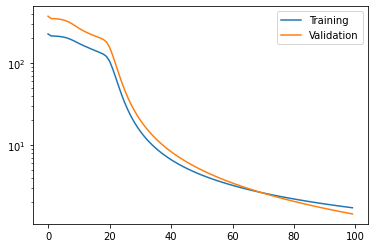

In [6]:
XOR.plot()

In [7]:
test = np.array([1, 0]).reshape(2, 1)
XOR.predict_for_valid(test)

array([[0.97853856]])

In [8]:
N = 1000
X_and, Y_and = generate_samples(N, "AND")
AND = MLP(X_and, Y_and, validation_split = 0.1)

In [9]:
%%time
AND.train(epochs=100, mini_batch_size=64)


Epoch 1 :- Training Loss is 139.73967532077938, Validation Loss is 234.53639459158686
Epoch 2 :- Training Loss is 101.19244872836217, Validation Loss is 171.26045045868594
Epoch 3 :- Training Loss is 71.88720137649324, Validation Loss is 122.68994410722289
Epoch 4 :- Training Loss is 49.769727107929775, Validation Loss is 86.69732507851293
Epoch 5 :- Training Loss is 35.05409859853065, Validation Loss is 62.64536353109689
Epoch 6 :- Training Loss is 25.694894422476033, Validation Loss is 47.23823443801763
Epoch 7 :- Training Loss is 19.678368634053864, Validation Loss is 37.235956122632345
Epoch 8 :- Training Loss is 15.665744895658705, Validation Loss is 30.48102104693026
Epoch 9 :- Training Loss is 12.874068464594037, Validation Loss is 25.71551660424159
Epoch 10 :- Training Loss is 10.853944461654292, Validation Loss is 22.217449319765212
Epoch 11 :- Training Loss is 9.341340076020725, Validation Loss is 19.56111869438091
Epoch 12 :- Training Loss is 8.175396421228498, Validation L

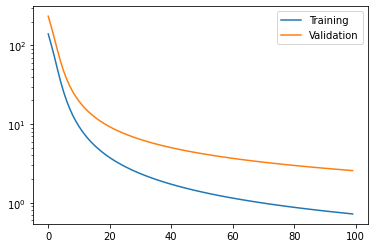

In [10]:
AND.plot()

In [11]:
test = np.array([1, 0]).reshape(2, 1)
AND.predict_for_valid(test)

array([[0.00417129]])

In [12]:
N = 1000
X_or, Y_or = generate_samples(N, "OR")
OR = MLP(X_or, Y_or, validation_split = 0.1)

In [13]:
%%time
OR.train(epochs=100, mini_batch_size=64)


Epoch 1 :- Training Loss is 193.8667732854343, Validation Loss is 310.158823275941
Epoch 2 :- Training Loss is 116.82652168397362, Validation Loss is 194.92049367355708
Epoch 3 :- Training Loss is 77.38146689453404, Validation Loss is 127.366585487815
Epoch 4 :- Training Loss is 47.12047341258823, Validation Loss is 76.10908065472799
Epoch 5 :- Training Loss is 30.02604134441546, Validation Loss is 47.40978584345055
Epoch 6 :- Training Loss is 20.7751338494748, Validation Loss is 31.991001099611378
Epoch 7 :- Training Loss is 15.430728595960076, Validation Loss is 23.156512140961237
Epoch 8 :- Training Loss is 12.087943970701915, Validation Loss is 17.685526389233758
Epoch 9 :- Training Loss is 9.849775739761542, Validation Loss is 14.063090522230972
Epoch 10 :- Training Loss is 8.267593284001796, Validation Loss is 11.532385154969525
Epoch 11 :- Training Loss is 7.100049006314088, Validation Loss is 9.687272112505172
Epoch 12 :- Training Loss is 6.208372083729713, Validation Loss is 

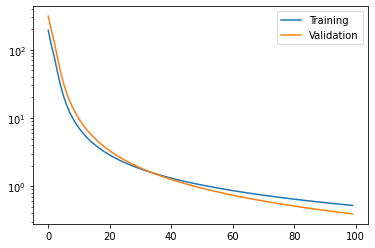

In [14]:
OR.plot()

In [15]:
test = np.array([1, 0]).reshape(2, 1)
OR.predict_for_valid(test)

array([[0.99035505]])